## Detection of Ransomware in Bitcoin Heist Transaction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BitcoinHeistData.csv')

In [ ]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [ ]:
# get descriptive statistics
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [ ]:
# get the shape of the dataframe
print(df.shape)

(2916697, 10)


In [ ]:
# check for missing values
print(df.isnull().sum())

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


In [ ]:
# drop date, year and address columns
df = df.drop(['year'], axis=1)
df = df.drop(['day'], axis=1)
df = df.drop(['address'], axis=1)

# Exploratory Data Analysis

In [ ]:
# 1. Correlation matrix
corr = df.corr()
print(corr)

             length    weight     count    looped  neighbors    income
length     1.000000  0.000228  0.703467  0.411609   0.031523  0.000488
weight     0.000228  1.000000  0.022313  0.061646   0.691963  0.069774
count      0.703467  0.022313  1.000000  0.560370   0.025441 -0.003635
looped     0.411609  0.061646  0.560370  1.000000   0.052826  0.002551
neighbors  0.031523  0.691963  0.025441  0.052826   1.000000  0.138966
income     0.000488  0.069774 -0.003635  0.002551   0.138966  1.000000


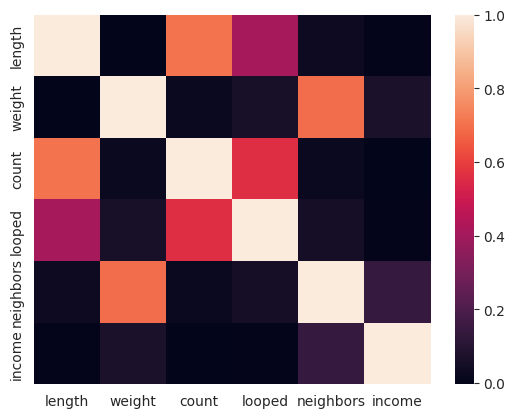

In [ ]:
# 2. Heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

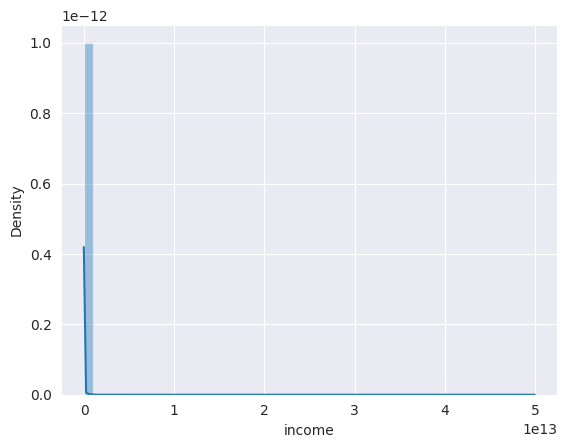

In [ ]:
#3. Distribution of each feature
sns.distplot(df['income'])
plt.savefig("income-skewed")

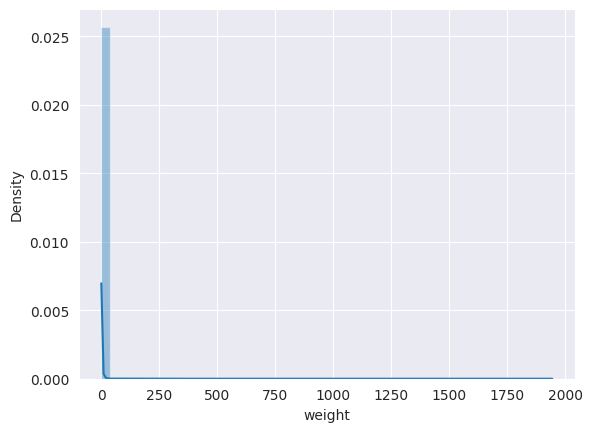

In [ ]:
sns.distplot(df['weight'])
plt.savefig("weight-skewed")

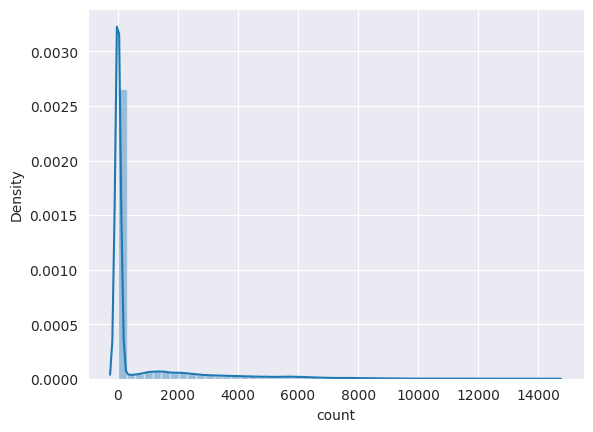

In [ ]:
sns.distplot(df['count'])
plt.savefig("count-skewed")

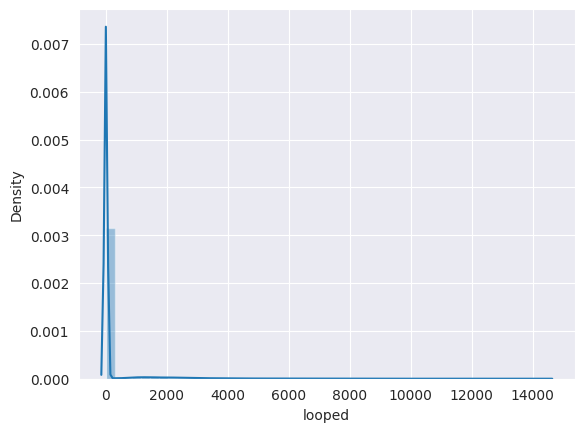

In [ ]:
sns.distplot(df['looped'])
plt.savefig("looped-skewed")

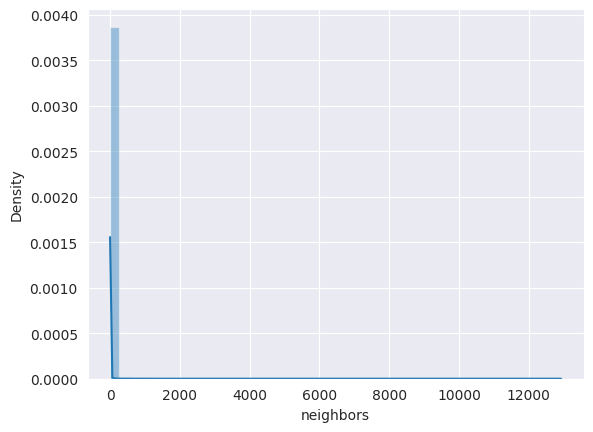

In [ ]:
sns.distplot(df['neighbors'])
plt.savefig("neighbours-skewed")

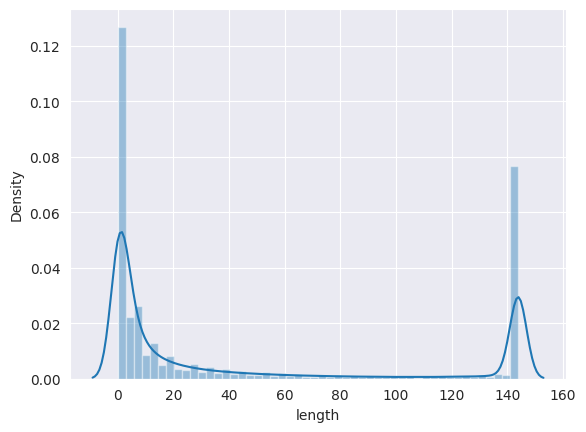

In [ ]:
sns.distplot(df['length'])
plt.savefig("length-skewed")

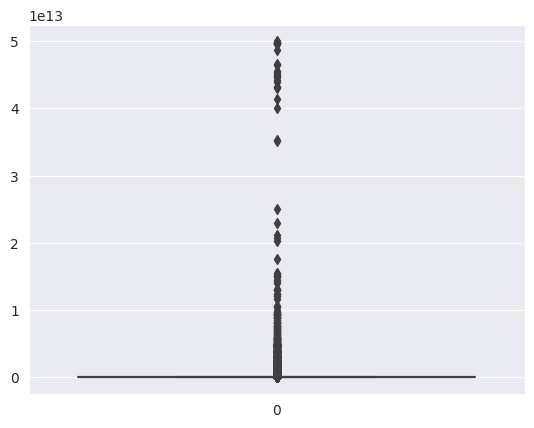

In [ ]:
#5. Boxplot
sns.boxplot(df['income'])
plt.show()

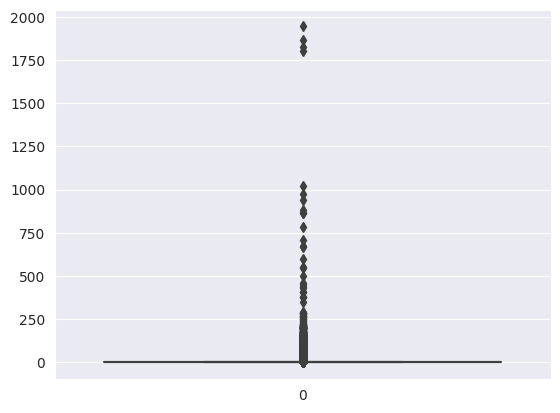

In [ ]:
sns.boxplot(df['weight'])
plt.show()

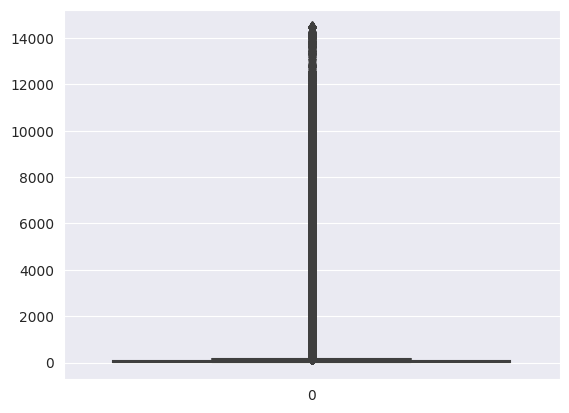

In [ ]:
sns.boxplot(df['count'])
plt.show()

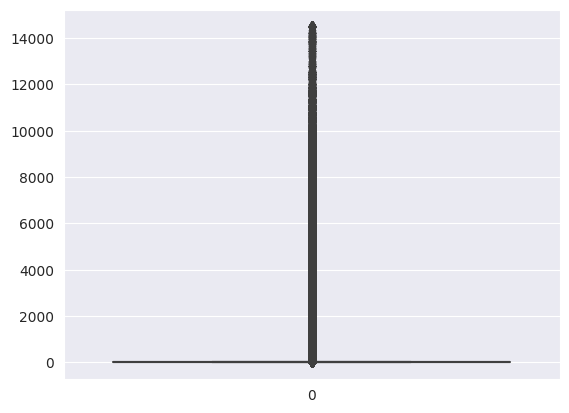

In [ ]:
sns.boxplot(df['looped'])
plt.show()

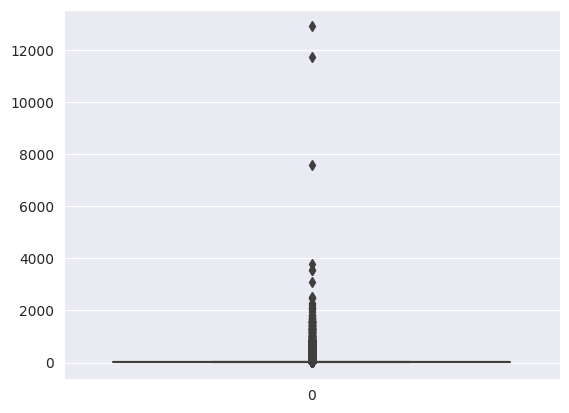

In [ ]:
sns.boxplot(df['neighbors'])
plt.show()

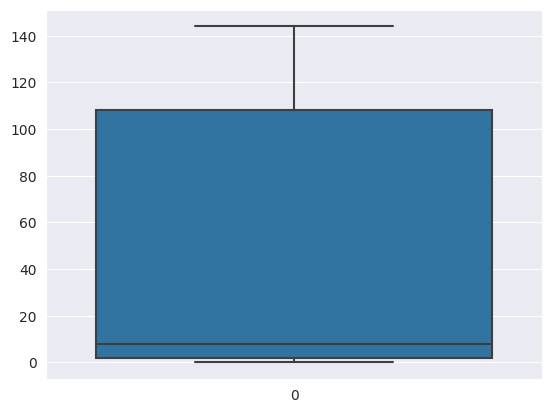

In [ ]:
sns.boxplot(df['length'])
plt.show()

In [ ]:
print(df['label'].value_counts())

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [ ]:
# show the % of each label
print(df['label'].value_counts(normalize=True)*100)

white                          98.580140
paduaCryptoWall                 0.424796
montrealCryptoLocker            0.319368
princetonCerber                 0.316214
princetonLocky                  0.227140
montrealCryptXXX                0.082936
montrealNoobCrypt               0.016560
montrealDMALockerv3             0.012137
montrealDMALocker               0.008606
montrealSamSam                  0.002126
montrealCryptoTorLocker2015     0.001886
montrealGlobeImposter           0.001886
montrealGlobev3                 0.001166
montrealGlobe                   0.001097
montrealWannaCry                0.000960
montrealRazy                    0.000446
montrealAPT                     0.000377
paduaKeRanger                   0.000343
montrealFlyper                  0.000309
montrealXTPLocker               0.000274
montrealXLockerv5.0             0.000240
montrealVenusLocker             0.000240
montrealCryptConsole            0.000240
montrealEDA2                    0.000206
montrealJigSaw  

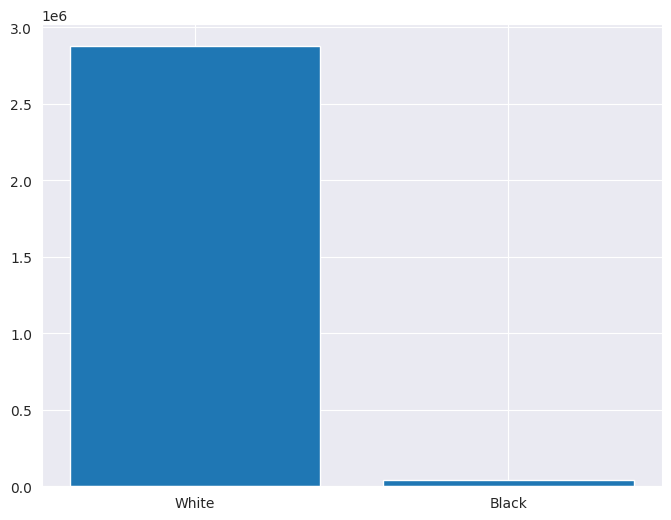

In [ ]:
# show the barchart of white label vs rest of the labels treated as black
label_white = []
label_black = []
for element in df.label:
    if element == 'white':
        label_white.append(element)
    else:
        label_black.append(element)

x_ax = ['White','Black']
y_ax = [len(label_white),len(label_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)
plt.savefig("imbalaced")

In [ ]:
# make right skewed data to normal distribution
df['income'] = np.log(df['income'])
df['weight'] = np.log(df['weight'])
df['count'] = np.log(df['count'])
df['looped'] = np.log(df['looped'])
df['neighbors'] = np.log(df['neighbors'])
df['length'] = np.log(df['length'])

In [ ]:
# drop nan values
df = df.dropna()
# drop inf rows
df = df[np.isfinite(df['income'])]
df = df[np.isfinite(df['weight'])]
df = df[np.isfinite(df['count'])]
df = df[np.isfinite(df['looped'])]
df = df[np.isfinite(df['neighbors'])]
df = df[np.isfinite(df['length'])]

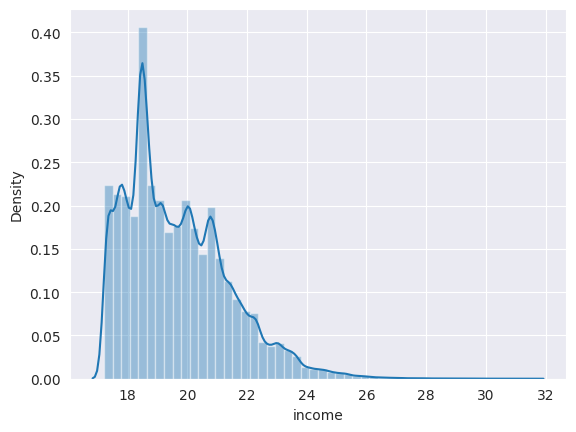

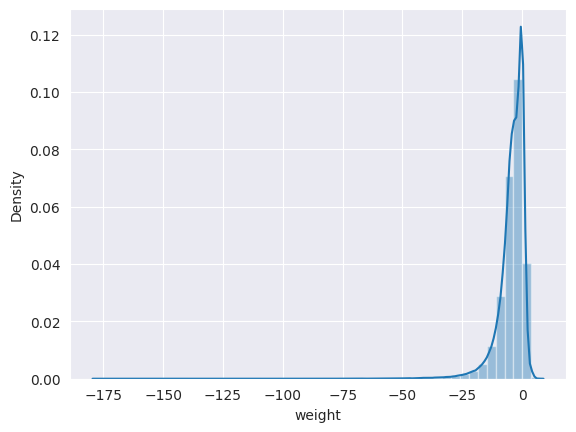

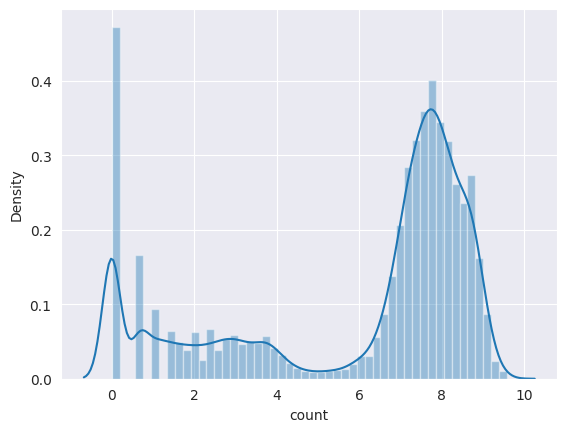

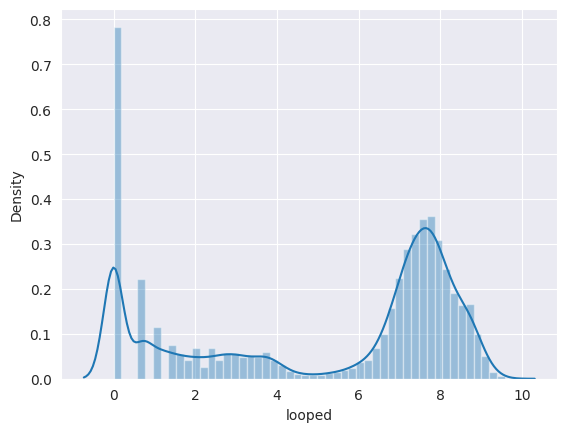

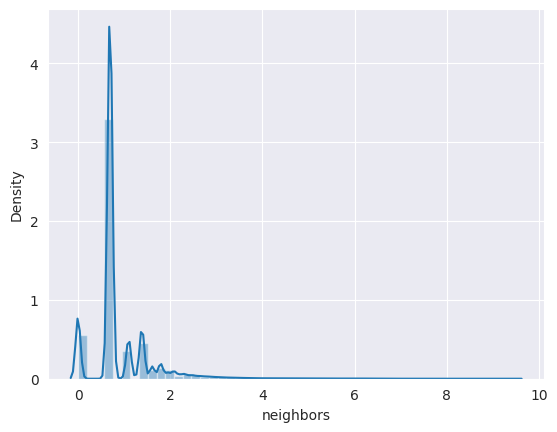

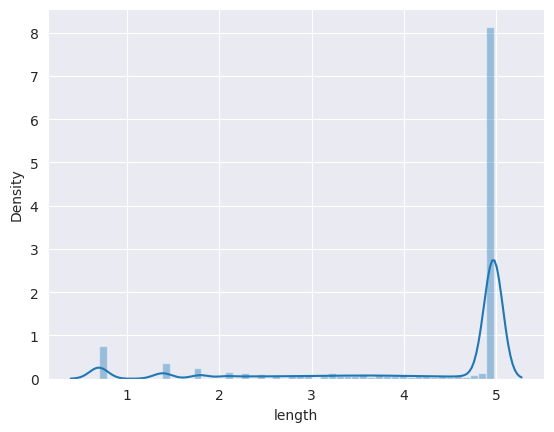

In [ ]:
# distribution of each feature
sns.distplot(df['income'])
plt.show()
sns.distplot(df['weight'])
plt.show()
sns.distplot(df['count'])
plt.show()
sns.distplot(df['looped'])
plt.show()
sns.distplot(df['neighbors'])
plt.show()
sns.distplot(df['length'])
plt.show()

             length    weight     count    looped  neighbors    income
length     1.000000 -0.210142  0.862473  0.711326  -0.105312 -0.137254
weight    -0.210142  1.000000 -0.039754 -0.141708   0.248401  0.227163
count      0.862473 -0.039754  1.000000  0.819876  -0.083986 -0.138381
looped     0.711326 -0.141708  0.819876  1.000000  -0.055417 -0.130386
neighbors -0.105312  0.248401 -0.083986 -0.055417   1.000000  0.436366
income    -0.137254  0.227163 -0.138381 -0.130386   0.436366  1.000000


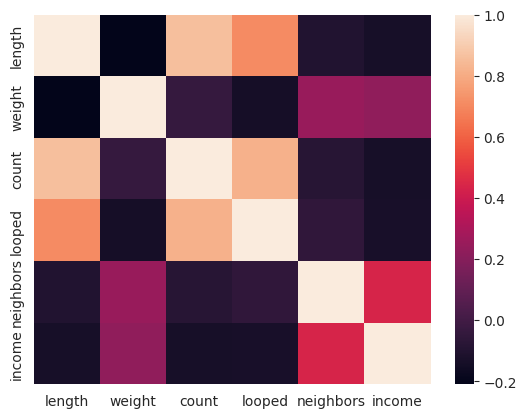

In [ ]:
# correlation matrix
corr = df.corr()
print(corr)

# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


In [ ]:
# convert label to categorical
df['label'] = df['label'].astype('category')
# make a copy of the dataframe
df_copy = df.copy()
# perform get_dummies on label
label_encode = pd.get_dummies(df_copy.label)
label_encode.white

27         0
33         0
98         0
109        0
121        0
          ..
2916667    1
2916668    1
2916680    1
2916688    1
2916694    1
Name: white, Length: 411820, dtype: uint8

In [ ]:
# make a new column called 'label_encoded' in df
df['label_encoded'] = label_encode.white
# drop label column
df = df.drop(['label'], axis=1)
# reset index
df = df.reset_index(drop=True)
# get top 5 rows of the dataframe
print(df.head())

     length    weight     count    looped  neighbors     income  label_encoded
0  2.079442 -4.969813  0.000000  0.000000   0.693147  18.197537              0
1  4.969813  0.474460  8.631414  8.096513   0.693147  18.941377              0
2  2.484907 -9.939627  0.000000  0.000000   0.693147  18.197537              0
3  4.969813  1.299378  7.719130  0.693147   1.791759  19.304364              0
4  4.969813 -0.631770  7.579679  7.080868   0.000000  18.323068              0


In [ ]:
# corelation matrix
corr = df.corr()
print(corr)

                 length    weight     count    looped  neighbors    income  \
length         1.000000 -0.210142  0.862473  0.711326  -0.105312 -0.137254   
weight        -0.210142  1.000000 -0.039754 -0.141708   0.248401  0.227163   
count          0.862473 -0.039754  1.000000  0.819876  -0.083986 -0.138381   
looped         0.711326 -0.141708  0.819876  1.000000  -0.055417 -0.130386   
neighbors     -0.105312  0.248401 -0.083986 -0.055417   1.000000  0.436366   
income        -0.137254  0.227163 -0.138381 -0.130386   0.436366  1.000000   
label_encoded -0.003564 -0.058076  0.006606  0.046502  -0.035840 -0.029765   

               label_encoded  
length             -0.003564  
weight             -0.058076  
count               0.006606  
looped              0.046502  
neighbors          -0.035840  
income             -0.029765  
label_encoded       1.000000  


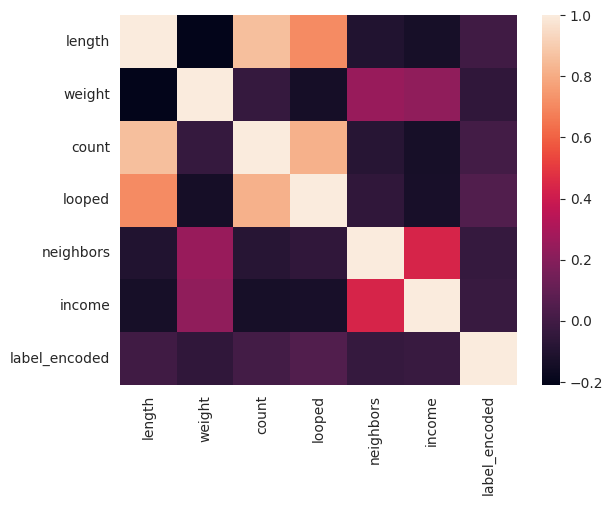

In [ ]:
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
check_cols=['length','weight','count','looped','neighbors','income']
train_set=df[check_cols]
train_set.head()

,length,weight,count,looped,neighbors,income
0,2.079442,-4.969813,0.000000,0.000000,0.693147,18.197537
1,4.969813,0.474460,8.631414,8.096513,0.693147,18.941377
2,2.484907,-9.939627,0.000000,0.000000,0.693147,18.197537
3,4.969813,1.299378,7.719130,0.693147,1.791759,19.304364
4,4.969813,-0.631770,7.579679,7.080868,0.000000,18.323068


In [ ]:
clf=IsolationForest(n_jobs=6,random_state=23,contamination=0.01)
clf.fit(train_set)
y_pred_train=clf.predict(train_set)
y_pred_train

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
pd.value_counts(y_pred_train)

 1    407701
-1      4119
dtype: int64

In [ ]:
train_set.loc[y_pred_train==-1,:]

,length,weight,count,looped,neighbors,income
1289,4.736198,-33.263283,0.000000,0.000000,0.693147,23.248994
1898,2.079442,2.700076,3.044522,2.302585,4.060443,21.765660
2207,4.969813,3.437484,8.520587,8.520587,3.912023,25.194905
2376,4.700480,-42.935597,2.564949,2.564949,1.098612,22.737439
2541,4.969813,6.211179,8.059592,7.862112,4.158883,28.584608
...,...,...,...,...,...,...
411488,4.969813,6.319289,8.705165,8.705165,5.572154,27.192811
411615,4.969813,0.917464,0.693147,0.693147,5.666427,24.775242
411684,0.693147,0.648695,0.000000,0.000000,3.178054,24.431418
411757,4.969813,4.144277,9.024974,0.000000,4.158883,24.424630


In [ ]:
abn_ind=np.where(y_pred_train<0)
abn_ind

(array([  1289,   1898,   2207, ..., 411684, 411757, 411819]),)

In [ ]:
x=df.values

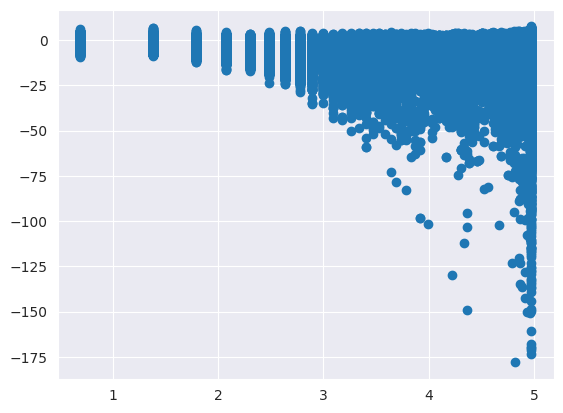

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

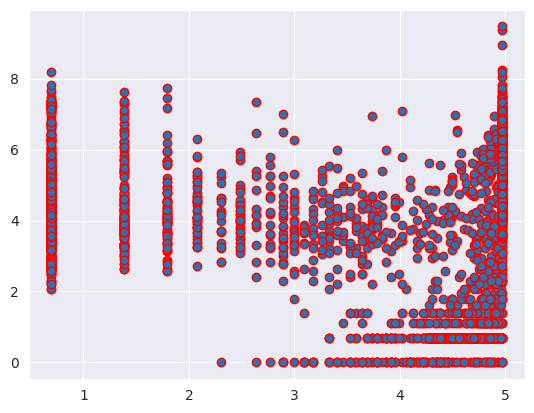

In [ ]:
plt.scatter(x[abn_ind,0],x[abn_ind,4],edgecolors="r")

In [ ]:
# if neighbours is greater than log(2) then encode it as 0 else encode it as 1
df['neighbors'] = np.where(df['neighbors'] > np.log(2), 0, 1)
# if length is greater than log(8) then encode it as 0 else encode it as 1
df['length'] = np.where(df['length'] > np.log(8), 0, 1)
# if count is greater than log(1) then encode it as 0 else encode it as 1
df['count'] = np.where(df['count'] > np.log(1), 0, 1)
# if looped is greater than log(1) then encode it as 0 else encode it as 1
df['looped'] = np.where(df['looped'] > np.log(1), 0, 1)

                 length    weight     count    looped  neighbors    income  \
length         1.000000  0.217567  0.538111  0.456616  -0.205443  0.098541   
weight         0.217567  1.000000  0.025393  0.107448  -0.330412  0.227163   
count          0.538111  0.025393  1.000000  0.751016  -0.119753  0.102171   
looped         0.456616  0.107448  0.751016  1.000000  -0.153561  0.100278   
neighbors     -0.205443 -0.330412 -0.119753 -0.153561   1.000000 -0.353924   
income         0.098541  0.227163  0.102171  0.100278  -0.353924  1.000000   
label_encoded  0.001650 -0.058076  0.002793 -0.027589   0.060872 -0.029765   

               label_encoded  
length              0.001650  
weight             -0.058076  
count               0.002793  
looped             -0.027589  
neighbors           0.060872  
income             -0.029765  
label_encoded       1.000000  


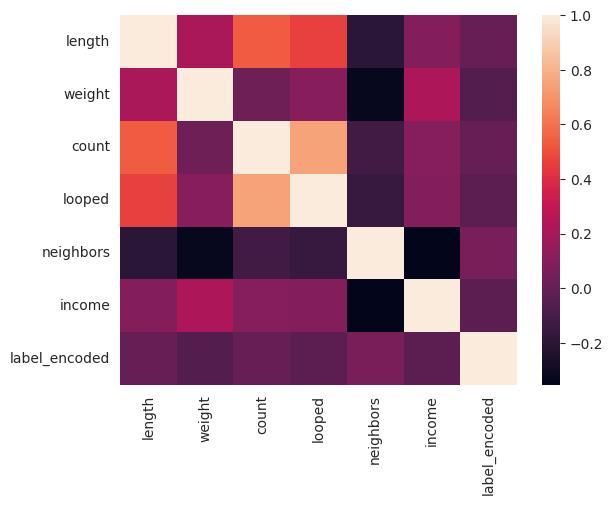

In [ ]:
# corelation matrix
corr = df.corr()
print(corr)
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [ ]:
# scale the except the label encoded column
df_copy = df.copy()
# scaler = StandardScaler()
# drop label column
df_copy = df_copy.drop(['label_encoded'], axis=1)
# fit the scaler
# scaler.fit(df_copy)
# transform the data
# df_copy = scaler.transform(df_copy)
# add the label encoded column back
df_copy = pd.concat([pd.DataFrame(df_copy), df['label_encoded']], axis=1)
# reset index
df_copy = df_copy.reset_index(drop=True)
# rename the columns
df_copy.columns = ['length', 'weight', 'count', 'looped', 'neighbors', 'income', 'label_encoded']
# get top 5 rows of the dataframe
print(df_copy.head())

   length    weight  count  looped  neighbors     income  label_encoded
0       1 -4.969813      1       1          1  18.197537              0
1       0  0.474460      0       0          1  18.941377              0
2       0 -9.939627      1       1          1  18.197537              0
3       0  1.299378      0       0          0  19.304364              0
4       0 -0.631770      0       0          1  18.323068              0


In [ ]:
# since majority of labels are white we need to balance the dataset
# create a new dataframe with only white label
df_white = df_copy[df_copy['label_encoded'] == 1]
# create a new dataframe with only black label
df_black = df_copy[df_copy['label_encoded'] == 0]
# get the number of rows in each dataframe
white_count = len(df_white)
black_count = len(df_black)

print(white_count,black_count)

# get the number of rows to be removed
remove_count = white_count - black_count
# get the index of the rows to be removed
if(remove_count>0):
  remove_index = df_white.sample(remove_count).index
  # drop the rows
  df_white = df_white.drop(remove_index)
else:
  remove_index = df_black.sample(abs(remove_count)).index
  # drop the rows
  df_black =df_black.drop(remove_index)

# merge the two dataframes
df_balanced = pd.concat([df_white, df_black], axis=0)
# reset index
df_balanced = df_balanced.reset_index(drop=True)
# get top 5 rows of the dataframe
print(df_balanced.head())

407349 4471
   length    weight  count  looped  neighbors     income  label_encoded
0       0  1.599388      0       0          1  21.570421              1
1       0 -0.031749      0       0          1  19.113828              1
2       0  0.424808      0       0          0  20.676174              1
3       0  1.553530      0       0          0  22.579564              1
4       0  0.365470      0       0          0  19.552083              1


1    50.0
0    50.0
Name: label_encoded, dtype: float64


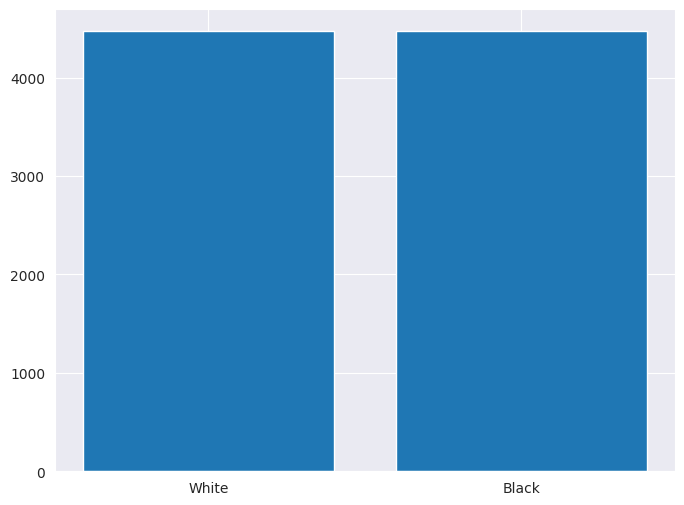

In [ ]:
# check if the dataframe is balanced
print(df_balanced['label_encoded'].value_counts(normalize=True)*100)

bw_white = []
bw_black = []
for element in df_balanced.label_encoded:
    if element == 1:
        bw_white.append(element)
    else:
        bw_black.append(element)

x_ax = ['White','Black']
y_ax = [len(bw_white),len(bw_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)
plt.savefig("balanced.png")

                 length    weight     count    looped  neighbors    income  \
length         1.000000  0.125904  0.512720  0.397353  -0.087287 -0.002925   
weight         0.125904  1.000000 -0.061251  0.044020  -0.361150  0.261926   
count          0.512720 -0.061251  1.000000  0.622946   0.008708 -0.036486   
looped         0.397353  0.044020  0.622946  1.000000  -0.071269 -0.016139   
neighbors     -0.087287 -0.361150  0.008708 -0.071269   1.000000 -0.422139   
income        -0.002925  0.261926 -0.036486 -0.016139  -0.422139  1.000000   
label_encoded  0.001678 -0.327011  0.010770 -0.123877   0.260033 -0.160759   

               label_encoded  
length              0.001678  
weight             -0.327011  
count               0.010770  
looped             -0.123877  
neighbors           0.260033  
income             -0.160759  
label_encoded       1.000000  


<Axes: >

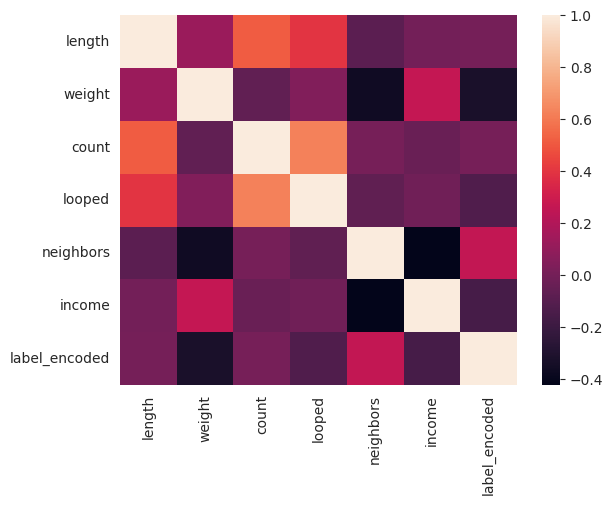

In [ ]:
# corelation matrix
corr = df_balanced.corr()
print(corr)
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
# split the dataframe into train and test
X = df_balanced.drop(['label_encoded'], axis=1)
y = df_balanced['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler
scaler.fit(X_train)
# transform the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# scale the data by MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler3 = MinMaxScaler()
# fit the scaler
scaler3.fit(X_train)
# transform the data
X_train = scaler3.transform(X_train)
X_test = scaler3.transform(X_test)

# scale the data by RobustScaler
from sklearn.preprocessing import RobustScaler
# scale the data
scaler2 = RobustScaler()
# fit the scaler
scaler2.fit(X_train)
# transform the data
X_train = scaler2.transform(X_train)
X_test = scaler2.transform(X_test)


In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
# create a logistic regression model
log_reg = LogisticRegression()
# fit the model
log_reg.fit(X_train, y_train)
# predict the labels
y_pred = log_reg.predict(X_test)
# get the accuracy score
print(log_reg.score(X_test, y_test))

0.6925083861349236


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[998 350]
 [475 860]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1348
           1       0.71      0.64      0.68      1335

    accuracy                           0.69      2683
   macro avg       0.69      0.69      0.69      2683
weighted avg       0.69      0.69      0.69      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.64
Precision Score: 0.71
F1 Score: 0.68
Accuracy Score: 0.69


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.6922754198201803


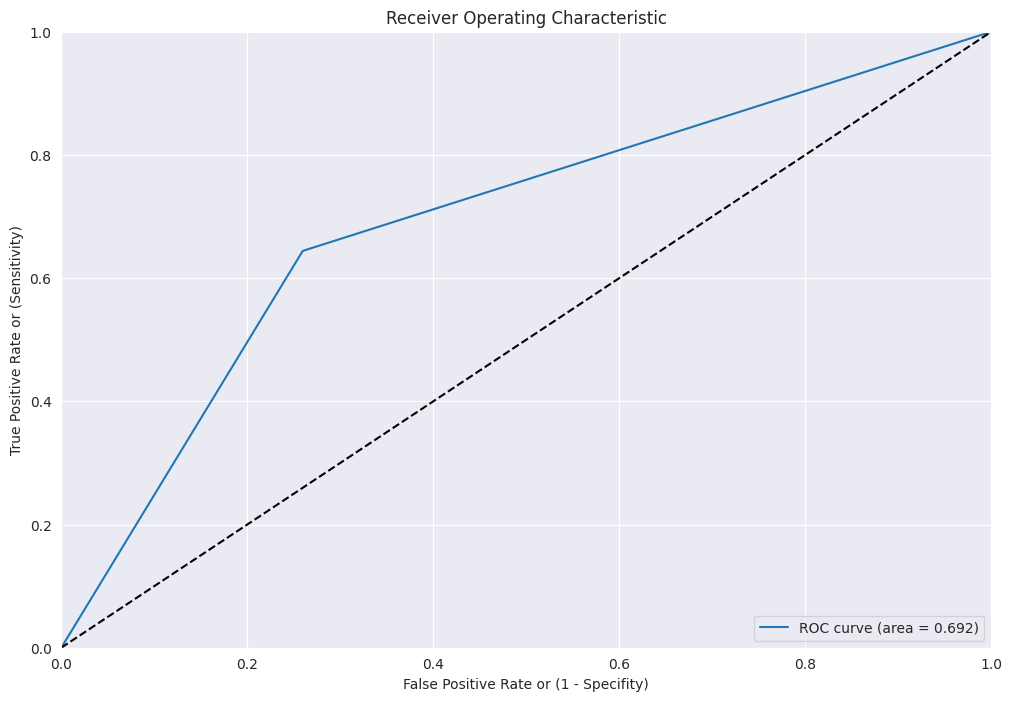

In [ ]:
# get the roc curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc1 = roc_auc_score(y_test, y_pred)
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.3f)' % roc1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
# create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model
knn.fit(X_train, y_train)
# predict the labels
y_pred = knn.predict(X_test)
# get the accuracy score
print(knn.score(X_test, y_test))

0.7048080506895267


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1000  348]
 [ 444  891]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1348
           1       0.72      0.67      0.69      1335

    accuracy                           0.70      2683
   macro avg       0.71      0.70      0.70      2683
weighted avg       0.71      0.70      0.70      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.67
Precision Score: 0.72
F1 Score: 0.69
Accuracy Score: 0.70


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7046277464741774


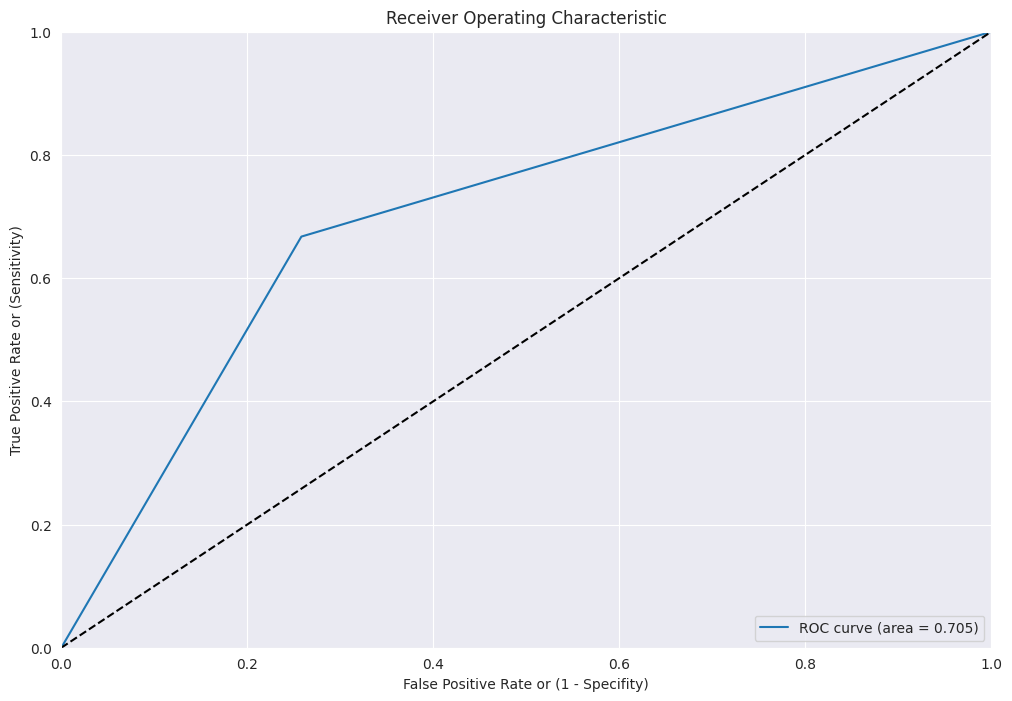

In [ ]:
# get the roc curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc2 = roc_auc_score(y_test, y_pred)
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc2)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# support vector machine model
from sklearn.svm import SVC
# create a SVM model
svm = SVC(kernel='rbf', gamma=0.1, C=1)
# fit the model
svm.fit(X_train, y_train)
# predict the labels
y_pred = svm.predict(X_test)
# get the accuracy score
print(svm.score(X_test, y_test))

0.7163622810286993


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1145  203]
 [ 558  777]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1348
           1       0.79      0.58      0.67      1335

    accuracy                           0.72      2683
   macro avg       0.73      0.72      0.71      2683
weighted avg       0.73      0.72      0.71      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.58
Precision Score: 0.79
F1 Score: 0.67
Accuracy Score: 0.72


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7157145000500117


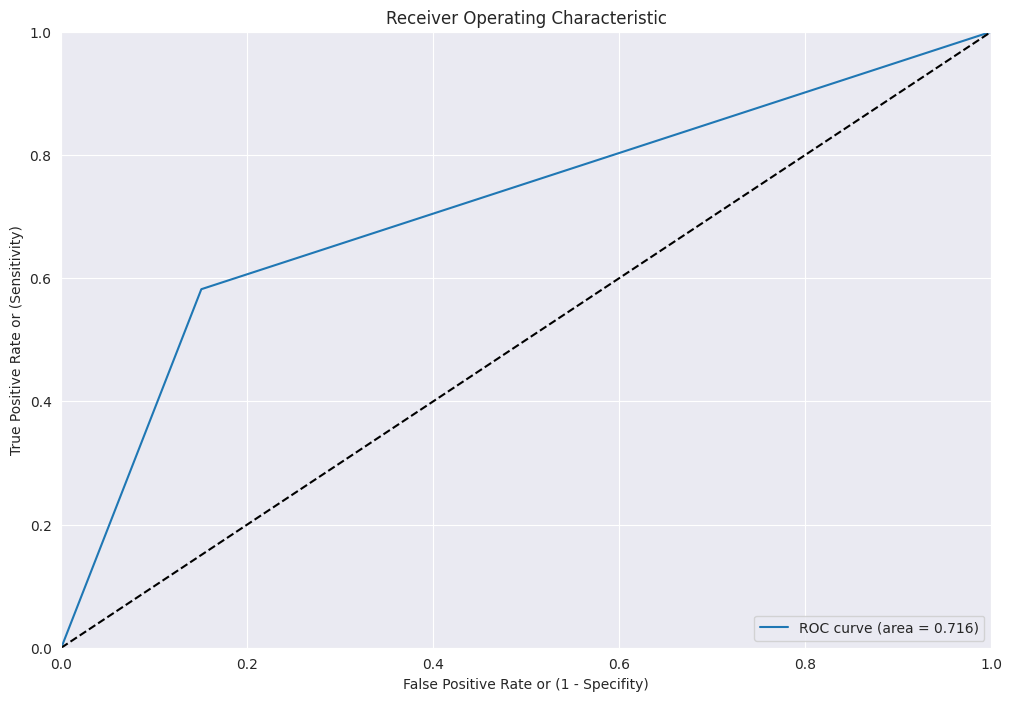

In [ ]:
# get the roc curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc3 = roc_auc_score(y_test, y_pred)
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.3f)' % roc3)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# create a decision tree model
dec_tree = DecisionTreeClassifier()
# fit the model
dec_tree.fit(X_train, y_train)
# predict the labels
y_pred = dec_tree.predict(X_test)
# get the accuracy score
print(dec_tree.score(X_test, y_test))

0.6708907938874394


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[878 470]
 [413 922]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1348
           1       0.66      0.69      0.68      1335

    accuracy                           0.67      2683
   macro avg       0.67      0.67      0.67      2683
weighted avg       0.67      0.67      0.67      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.69
Precision Score: 0.66
F1 Score: 0.68
Accuracy Score: 0.67


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.6709860078462753


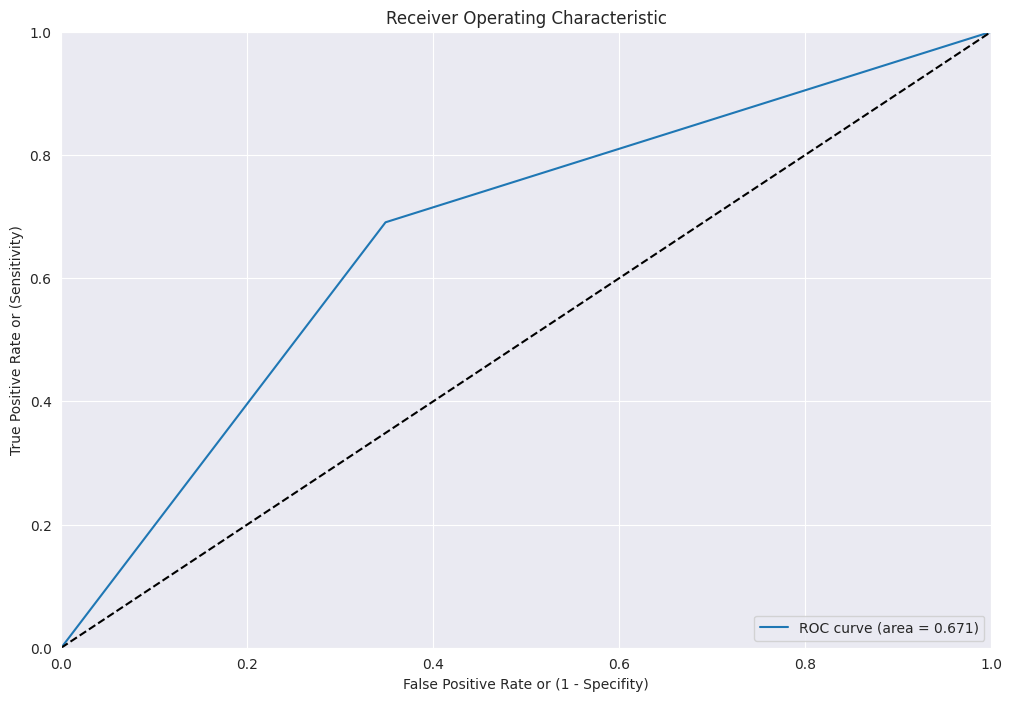

In [ ]:
# get the roc curve
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc4 = roc_auc_score(y_test, y_pred)
plt.plot(fpr4, tpr4, label='ROC curve (area = %0.3f)' % roc4)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
# create a random forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100)
# fit the model
rf.fit(X_train, y_train)
# predict the labels
y_pred = rf.predict(X_test)
# get the accuracy score
print(rf.score(X_test, y_test))

0.7178531494595602


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[988 360]
 [397 938]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1348
           1       0.72      0.70      0.71      1335

    accuracy                           0.72      2683
   macro avg       0.72      0.72      0.72      2683
weighted avg       0.72      0.72      0.72      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.70
Precision Score: 0.72
F1 Score: 0.71
Accuracy Score: 0.72


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7177797041531913


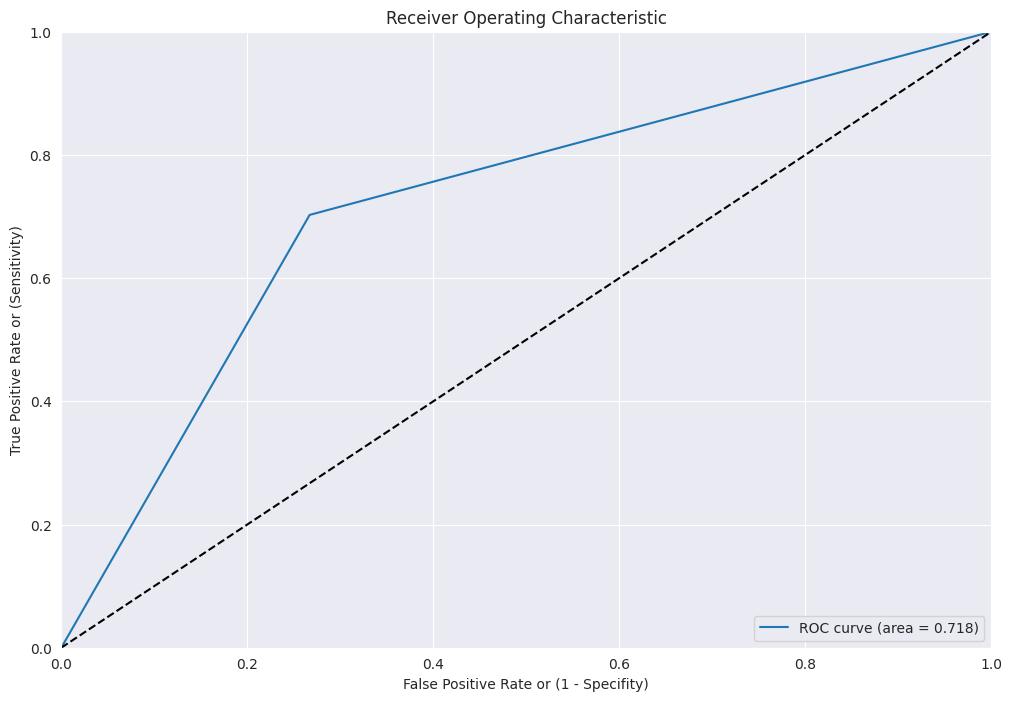

In [ ]:
# get the roc curve
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc5 = roc_auc_score(y_test, y_pred)
plt.plot(fpr5, tpr5, label='ROC curve (area = %0.3f)' % roc5)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# adaboost model
from sklearn.ensemble import AdaBoostClassifier
# create a adaboost model with 100 trees
ada = AdaBoostClassifier(n_estimators=100)
# fit the model
ada.fit(X_train, y_train)
# predict the labels
y_pred = ada.predict(X_test)
# get the accuracy score
print(ada.score(X_test, y_test))

0.7238166231830041


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1089  259]
 [ 482  853]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1348
           1       0.77      0.64      0.70      1335

    accuracy                           0.72      2683
   macro avg       0.73      0.72      0.72      2683
weighted avg       0.73      0.72      0.72      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.64
Precision Score: 0.77
F1 Score: 0.70
Accuracy Score: 0.72


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7234074061725513


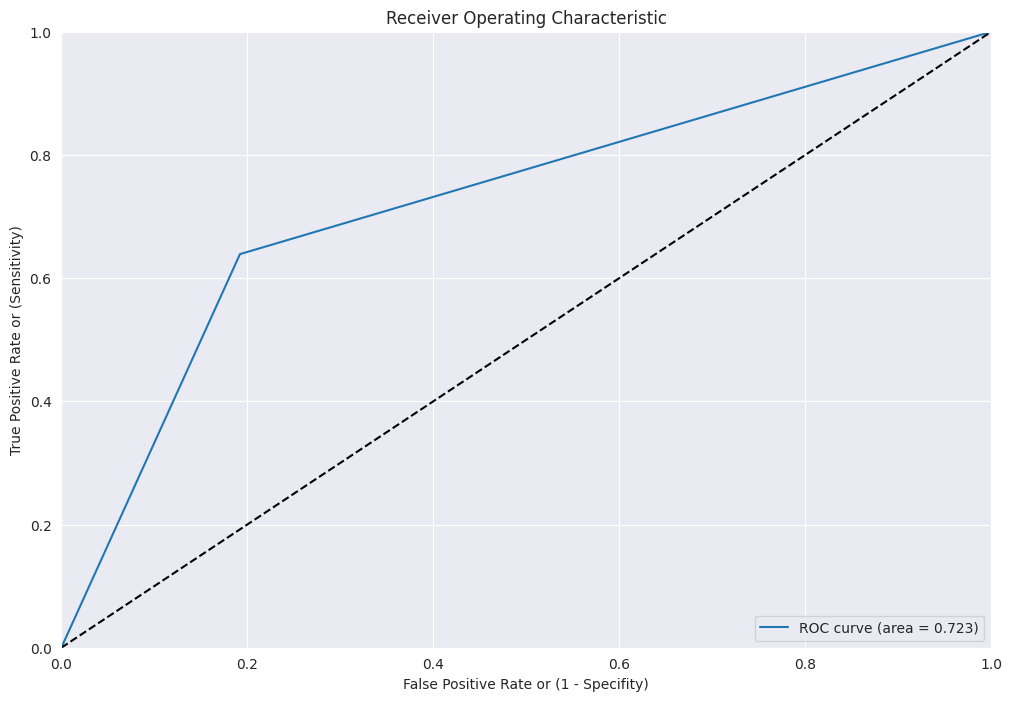

In [ ]:
# get the roc curve
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc6 = roc_auc_score(y_test, y_pred)
plt.plot(fpr6, tpr6, label='ROC curve (area = %0.3f)' % roc6)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
# create a gradient boosting model with 100 trees
gb = GradientBoostingClassifier(n_estimators=100)
# fit the model
gb.fit(X_train, y_train)
# predict the labels
y_pred = gb.predict(X_test)
# get the accuracy score
print(gb.score(X_test, y_test))

0.7439433469996273


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1119  229]
 [ 458  877]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1348
           1       0.79      0.66      0.72      1335

    accuracy                           0.74      2683
   macro avg       0.75      0.74      0.74      2683
weighted avg       0.75      0.74      0.74      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.66
Precision Score: 0.79
F1 Score: 0.72
Accuracy Score: 0.74


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7435237666566643


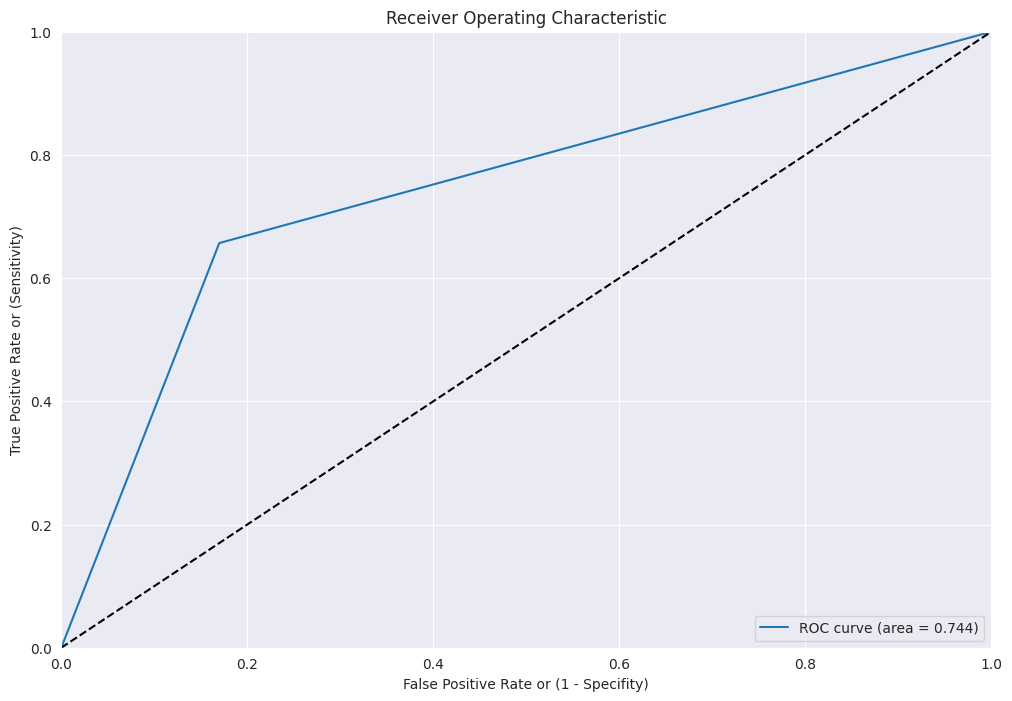

In [ ]:
# get the roc curve
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc7 = roc_auc_score(y_test, y_pred)
plt.plot(fpr7, tpr7, label='ROC curve (area = %0.3f)' % roc7)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# Artificial Neural Network model
from sklearn.neural_network import MLPClassifier
# create a neural network model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
# fit the model
nn.fit(X_train, y_train)
# predict the labels
y_pred = nn.predict(X_test)
# get the accuracy score
print(nn.score(X_test, y_test))

0.7338799850913157


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1050  298]
 [ 416  919]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1348
           1       0.76      0.69      0.72      1335

    accuracy                           0.73      2683
   macro avg       0.74      0.73      0.73      2683
weighted avg       0.74      0.73      0.73      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.69
Precision Score: 0.76
F1 Score: 0.72
Accuracy Score: 0.73


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.733660631925227


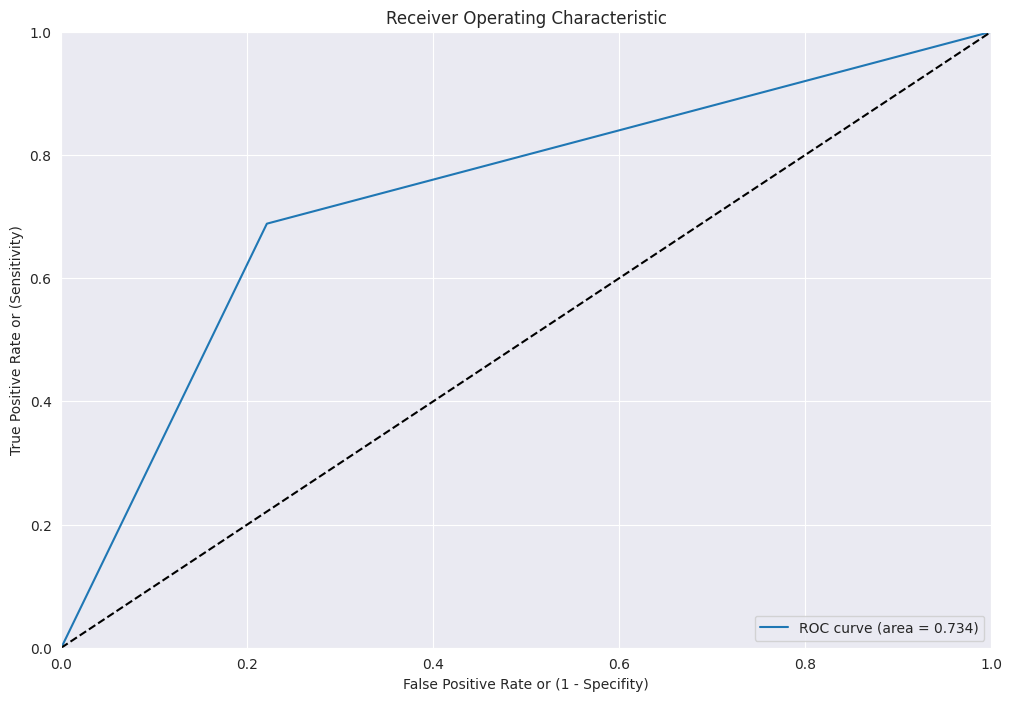

In [ ]:
# get the roc curve
fpr8, tpr8, thresholds8 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc8 = roc_auc_score(y_test, y_pred)
plt.plot(fpr8, tpr8, label='ROC curve (area = %0.3f)' % roc8)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# Artificial Neural Network model with multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# create a multi-layer perceptron model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
# fit the model
mlp.fit(X_train, y_train)
# predict the labels
y_pred = mlp.predict(X_test)
# get the accuracy score
print(mlp.score(X_test, y_test))

0.7357435706298919


In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1080  268]
 [ 441  894]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1348
           1       0.77      0.67      0.72      1335

    accuracy                           0.74      2683
   macro avg       0.74      0.74      0.73      2683
weighted avg       0.74      0.74      0.73      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.67
Precision Score: 0.77
F1 Score: 0.72
Accuracy Score: 0.74


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7354249324842463


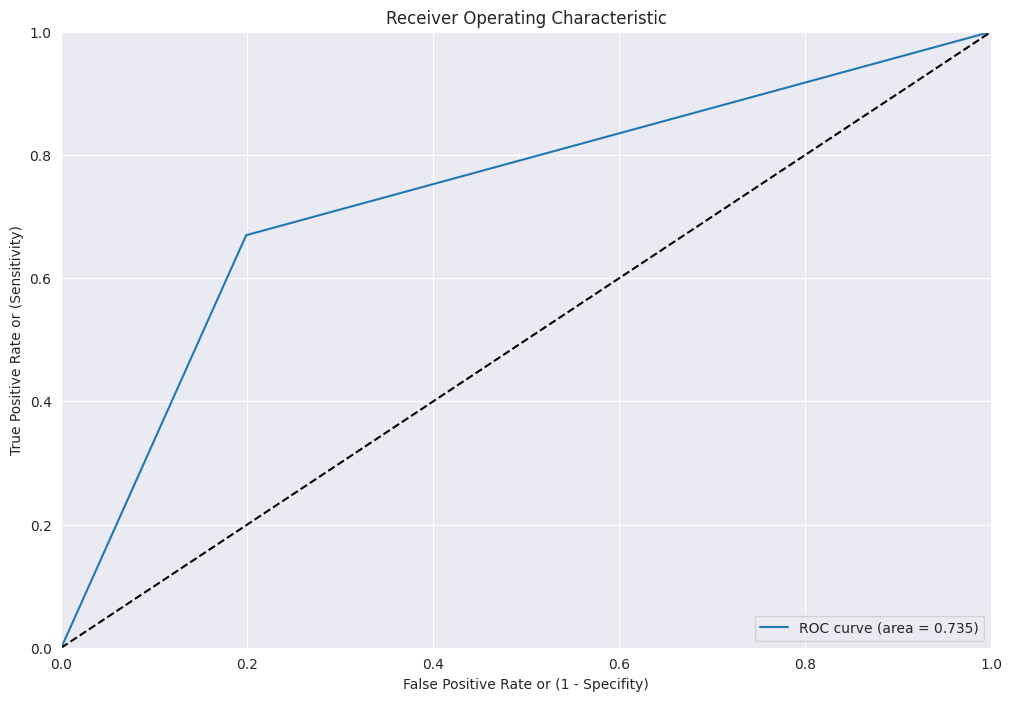

In [ ]:
# get the roc curve
fpr9, tpr9, thresholds9 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc9 = roc_auc_score(y_test, y_pred)
plt.plot(fpr9, tpr9, label='ROC curve (area = %0.3f)' % roc9)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1348
           1       0.77      0.67      0.72      1335

    accuracy                           0.74      2683
   macro avg       0.74      0.74      0.73      2683
weighted avg       0.74      0.74      0.73      2683



In [ ]:
#keras Neural Network with 5 hidden layers with 'relu' activation function and adam optimizer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
model = Sequential()
model.add(Dense(units=128, activation='relu', kernel_initializer='normal', input_dim=6))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=12)
# predict the labels
y_pred = model.predict(X_test)

Epoch 1/150
522/522 [==============================] - 3s 3ms/step - loss: 0.5849 - accuracy: 0.7035
Epoch 2/150
522/522 [==============================] - 1s 3ms/step - loss: 0.5570 - accuracy: 0.7199
Epoch 3/150
522/522 [==============================] - 1s 3ms/step - loss: 0.5490 - accuracy: 0.7214
Epoch 4/150
522/522 [==============================] - 1s 3ms/step - loss: 0.5462 - accuracy: 0.7244
Epoch 5/150
522/522 [==============================] - 2s 4ms/step - loss: 0.5433 - accuracy: 0.7301
Epoch 6/150
522/522 [==============================] - 2s 4ms/step - loss: 0.5417 - accuracy: 0.7322
Epoch 7/150
522/522 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.7327
Epoch 8/150
522/522 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7335
Epoch 9/150
522/522 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7325
Epoch 10/150
522/522 [==============================] - 1s 3ms/step - loss: 0.5361 - accura

In [ ]:
# get the accuracy score
print(model.evaluate(X_test, y_test))

84/84 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7380
[0.5888103246688843, 0.7379798889160156]


In [ ]:
# convert y_pred to binary
y_pred = (y_pred > 0.5)

In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1084  264]
 [ 439  896]]


In [ ]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.76      1348
           1       0.77      0.67      0.72      1335

    accuracy                           0.74      2683
   macro avg       0.74      0.74      0.74      2683
weighted avg       0.74      0.74      0.74      2683



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.67
Precision Score: 0.77
F1 Score: 0.72
Accuracy Score: 0.74


In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7376576756798808


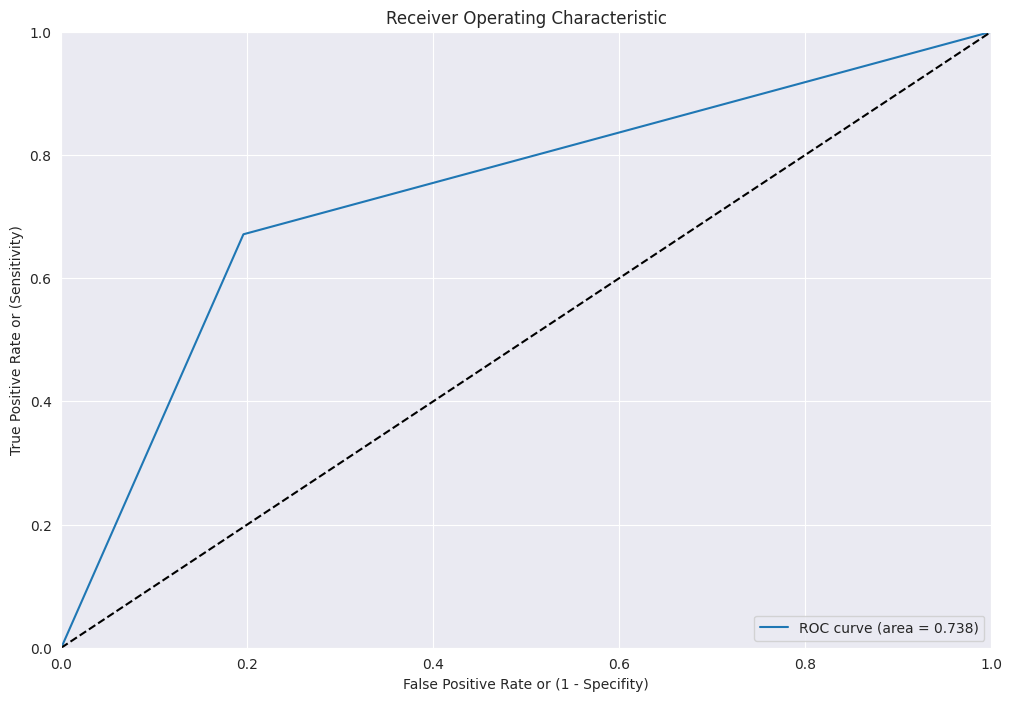

In [ ]:
# plot roc curve
# get the roc curve
fpr10, tpr10, thresholds10 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc10 = roc_auc_score(y_test, y_pred)
plt.plot(fpr10, tpr10, label='ROC curve (area = %0.3f)' % roc10)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [ ]:
X_train

array([[ 0.        ,  0.28559044,  0.        ,  0.        ,  0.        ,
        -0.19366543],
       [ 0.        ,  0.51368035,  0.        ,  0.        , -1.        ,
         1.30484312],
       [ 0.        ,  0.18314114,  0.        ,  0.        ,  0.        ,
        -0.77142596],
       ...,
       [ 0.        ,  0.69262178,  0.        ,  0.        , -1.        ,
         1.70405424],
       [ 0.        , -1.08306368,  0.        ,  0.        ,  0.        ,
        -0.47268387],
       [ 0.        ,  0.00654477,  0.        ,  0.        ,  0.        ,
        -0.00369958]])

In [ ]:
# from sklearn.ensemble import IsolationForest
# # Create an Isolation Forest model
# random_state = np.random.RandomState(42)
# model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.5),random_state=random_state)


# # Fit the model (no need for y_train as this is unsupervised)
# model.fit(df_balanced[['label_encoded']])

# print(model.get_params())

# # # Predict anomalies (1 for inliers, -1 for outliers)
# # y_pred = model.predict(X_test)

# # # Convert the prediction results to 0 (inliers) and 1 (outliers)
# # y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# # # Print the accuracy score

# # print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_binary)))


In [ ]:
# df_balanced['scores'] = model.decision_function(df_balanced[['label_encoded']])

# df_balanced['anomaly_score'] = model.predict(df_balanced[['label_encoded']])

# df_balanced[df_balanced['anomaly_score']==-1].head()

In [ ]:
# df_balanced.shape[0]

In [ ]:
# accuracy = 100*list(df_balanced['anomaly_score']).count(-1)/df_balanced.shape[0]
# print("Accuracy of the model:", accuracy)

In [ ]:
# weight
# count
# looped
# neighbors
# income
# label_encoded

In [ ]:

# # Print the confusion matrix
# cm = confusion_matrix(y_test, y_pred_binary)
# print(cm)

# # Print the classification report
# print(classification_report(y_test, y_pred_binary))

In [ ]:
# # Print additional metrics
# print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_binary)))
# print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_binary)))
# print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_binary)))

In [ ]:
# get the roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.7376576756798808


In [ ]:
# # plot roc curve
# # get the roc curve
# fpr11, tpr11, thresholds11 = roc_curve(y_test, y_pred)
# # Plot ROC curve
# plt.figure(figsize = (12,8))
# roc11 = roc_auc_score(y_test, y_pred)
# plt.plot(fpr11, tpr11, label='ROC curve (area = %0.3f)' % roc11)
# plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate or (1 - Specifity)')
# plt.ylabel('True Positive Rate or (Sensitivity)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")

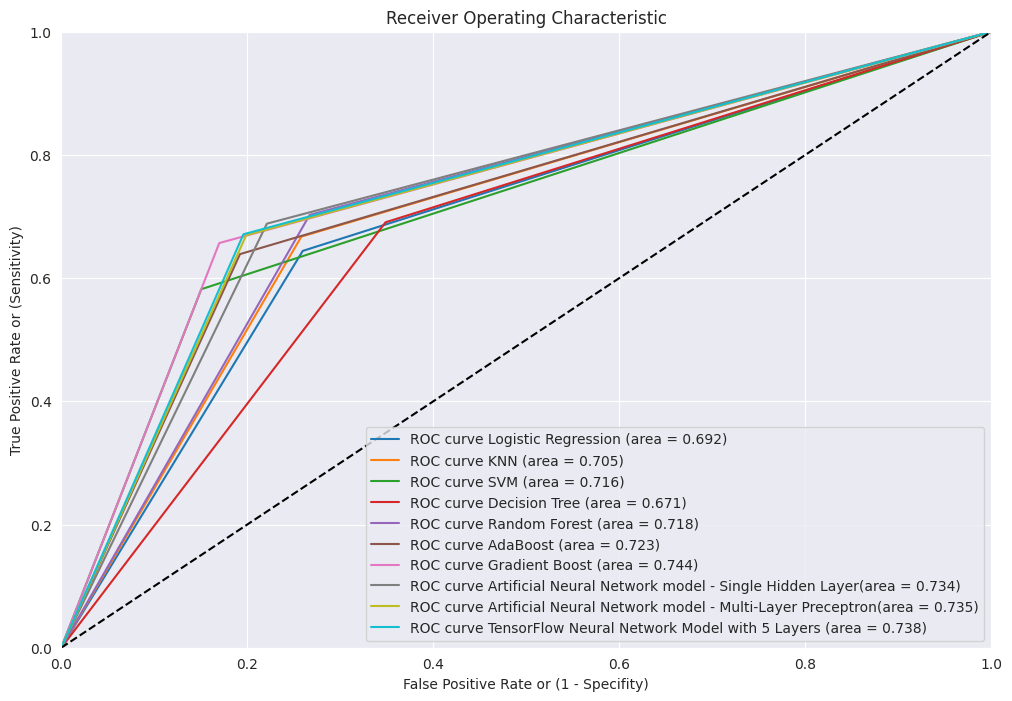

In [ ]:
plt.figure(figsize = (12,8))
roc10 = roc_auc_score(y_test, y_pred)
plt.plot(fpr1, tpr1, label='ROC curve Logistic Regression (area = %0.3f)' % roc1)
plt.plot(fpr2, tpr2, label='ROC curve KNN (area = %0.3f)' % roc2)
plt.plot(fpr3, tpr3, label='ROC curve SVM (area = %0.3f)' % roc3)
plt.plot(fpr4, tpr4, label='ROC curve Decision Tree (area = %0.3f)' % roc4)
plt.plot(fpr5, tpr5, label='ROC curve Random Forest (area = %0.3f)' % roc5)
plt.plot(fpr6, tpr6, label='ROC curve AdaBoost (area = %0.3f)' % roc6)
plt.plot(fpr7, tpr7, label='ROC curve Gradient Boost (area = %0.3f)' % roc7)
plt.plot(fpr8, tpr8, label='ROC curve Artificial Neural Network model - Single Hidden Layer(area = %0.3f)' % roc8)
plt.plot(fpr9, tpr9, label='ROC curve Artificial Neural Network model - Multi-Layer Preceptron(area = %0.3f)' % roc9)
plt.plot(fpr10, tpr10, label='ROC curve TensorFlow Neural Network Model with 5 Layers (area = %0.3f)' % roc10)
# plt.plot(fpr11, tpr11, label='ROC curve Isolation Forest (area = %0.3f)' % roc11)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig("roc-curves.png")
